In [9]:
# Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib
import scipy.stats as st
import seaborn as sns; sns.set();
from sklearn import datasets

In [10]:
# Name of the CSV file
csv_path1 = 'googleplaystore.csv'
csv_path2 = 'AppleStore.csv'

In [11]:
# The read the CSV file in pandas
googlestore = pd.read_csv(csv_path1)
googlestore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [12]:
applestore = pd.read_csv(csv_path2)

applestore.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [13]:
applestore.rename(columns={'track_name':'App',
                          'size_bytes':'Size',
                          'price':'Price',
                          'rating_count_tot':'Reviews',
                          'user_rating':'Rating',
                          'cont_rating':'Content Rating',
                          'prime_genre':'Category'}, 
                 inplace=True)
 
applestore.head()

,Unnamed: 0,id,App,Size,currency,Price,Reviews,rating_count_ver,Rating,user_rating_ver,ver,Content Rating,Category,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [19]:
merge = pd.merge(googlestore, applestore, on="App", suffixes=("_google", "_apple"))
merge

,App,Category_google,Rating_google,Reviews_google,Size_google,Installs,Type,Price_google,Content Rating_google,Genres,...,rating_count_ver,Rating_apple,user_rating_ver,ver,Content Rating_apple,Category_apple,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,...,21,4.0,4.0,1.5,4+,Productivity,24,5,1,1
1,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,"50,000,000+",Free,0,Everyone,Business,...,563,4.0,4.5,4.3,4+,Business,37,3,28,1
2,Uber Driver,BUSINESS,4.4,1254730,Varies with device,"10,000,000+",Free,0,Everyone,Business,...,39,3.0,3.0,3.158.1,4+,Business,37,5,37,1
3,ADP Mobile Solutions,BUSINESS,4.3,85185,29M,"5,000,000+",Free,0,Everyone,Business,...,306,4.0,3.0,2.8.2,4+,Business,37,5,24,1
4,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,73088,4.5,4.5,2.17.22,4+,Social Networking,12,0,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54M,"50,000,000+",Free,0,Everyone,Casual,...,64,4.5,4.5,1.4.3,4+,Games,38,5,13,1
549,Crazy Freekick,SPORTS,3.9,47688,17M,"5,000,000+",Free,0,Everyone,Sports,...,11,4.5,4.5,1.0.5,4+,Games,40,5,12,1
550,Fruit Ninja Classic,GAME,4.3,85468,36M,"1,000,000+",Paid,$0.99,Everyone,Arcade,...,132,4.5,4.0,2.3.9,4+,Games,38,5,13,1
551,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,$1.20,Everyone,Puzzle,...,23,4.5,5.0,2.0,4+,Games,40,4,16,1


In [20]:
# Delete column "Current Ver" , "Android Ver" and "Genres"
del merge["Current Ver"]
del merge["Android Ver"] 
del merge["Genres"] 
del merge["rating_count_ver"] 
del merge["user_rating_ver"]
del merge["ver"]
del merge["sup_devices.num"]
del merge["ipadSc_urls.num"]
del merge["lang.num"]
del merge["vpp_lic"]
del merge["Unnamed: 0"]
del merge["id"]    

In [21]:
merge.head()

,App,Category_google,Rating_google,Reviews_google,Size_google,Installs,Type,Price_google,Content Rating_google,Last Updated,Size_apple,currency,Price_apple,Reviews_apple,Rating_apple,Content Rating_apple,Category_apple
0,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,14-Jun-18,22405120,USD,0.0,65,4.0,4+,Productivity
1,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,"50,000,000+",Free,0,Everyone,21-May-18,3691520,USD,0.0,38681,4.0,4+,Business
2,Uber Driver,BUSINESS,4.4,1254730,Varies with device,"10,000,000+",Free,0,Everyone,3-Aug-18,162263040,USD,0.0,3289,3.0,4+,Business
3,ADP Mobile Solutions,BUSINESS,4.3,85185,29M,"5,000,000+",Free,0,Everyone,17-Jul-18,53805056,USD,0.0,8324,4.0,4+,Business
4,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,3-Aug-18,135044096,USD,0.0,287589,4.5,4+,Social Networking


In [22]:
# Identify incomplete rows
merge.count()

App                      553
Category_google          553
Rating_google            553
Reviews_google           553
Size_google              553
Installs                 553
Type                     553
Price_google             553
Content Rating_google    553
Last Updated             553
Size_apple               553
currency                 553
Price_apple              553
Reviews_apple            553
Rating_apple             553
Content Rating_apple     553
Category_apple           553
dtype: int64

In [23]:
# The "Reviews" and "Price" column are the wrong data types. They should be numeric.
merge.dtypes

App                       object
Category_google           object
Rating_google            float64
Reviews_google            object
Size_google               object
Installs                  object
Type                      object
Price_google              object
Content Rating_google     object
Last Updated              object
Size_apple                 int64
currency                  object
Price_apple              float64
Reviews_apple              int64
Rating_apple             float64
Content Rating_apple      object
Category_apple            object
dtype: object

In [25]:
# Convert the datatype of 'Reviews' column in google 
merge['Reviews'] = pd.to_numeric(merge['Reviews_google'])

# Remove dollar sign and convert the datatype of 'Price' column in google 
merge['Price_google'] = merge['Price_google'].str.replace('$', '')
merge['Price_google'] = pd.to_numeric(merge['Price_google'])

In [26]:
# Remove + sign and convert the datatype of 'Installs' column
merge['Installs'] = merge['Installs'].str.replace(",","")
merge['Installs'] = merge['Installs'].apply(lambda x: x.strip("+"))
merge['Installs']=merge['Installs'].astype(float)

In [27]:
# Make size into numeric
merge['Size_google'].replace('Varies with device', np.nan, inplace = True)
merge['Size_google']=merge['Size_google'].str.extract(r'([\d\.]+)', expand=False).astype(float) * \
merge['Size_google'].str.extract(r'([kM]+)', expand=False).fillna(1).replace(['k','M'],[1,1000]).astype(int)


In [29]:
# Verify datatypes have been changed
merge.dtypes

App                       object
Category_google           object
Rating_google            float64
Reviews_google            object
Size_google              float64
Installs                 float64
Type                      object
Price_google             float64
Content Rating_google     object
Last Updated              object
Size_apple                 int64
currency                  object
Price_apple              float64
Reviews_apple              int64
Rating_apple             float64
Content Rating_apple      object
Category_apple            object
Reviews                    int64
dtype: object

In [31]:
# Push the cleaned dataset to a new CSV file
merge.to_csv("Google_Vs_Apple.csv",
                  encoding="utf-8", index=False, header=True)

In [32]:
# Display a statistical overview
merge.describe()

,Rating_google,Size_google,Installs,Price_google,Size_apple,Price_apple,Reviews_apple,Rating_apple,Reviews
count,553.000000,384.000000,5.530000e+02,553.000000,5.530000e+02,553.000000,5.530000e+02,553.000000,5.530000e+02
mean,4.339060,47999.479167,1.044522e+08,0.543599,2.165915e+08,0.597125,1.515973e+05,4.088608,4.091043e+06
std,0.254369,27225.100723,2.180042e+08,2.176969,3.399909e+08,1.985095,3.572941e+05,0.628661,1.046127e+07
min,3.100000,1900.000000,1.000000e+03,0.000000,3.691520e+06,0.000000,7.000000e+00,1.500000,5.200000e+01
25%,4.200000,24000.000000,5.000000e+06,0.000000,8.192410e+07,0.000000,5.665000e+03,4.000000,8.067800e+04
50%,4.400000,46000.000000,1.000000e+07,0.000000,1.192366e+08,0.000000,2.907800e+04,4.500000,6.187960e+05
75%,4.500000,69250.000000,1.000000e+08,0.000000,1.999933e+08,0.000000,1.419600e+05,4.500000,3.778921e+06
max,4.900000,100000.000000,1.000000e+09,24.990000,3.508826e+09,19.990000,2.974676e+06,5.000000,7.815831e+07


# Which categories have the highest number of available apps?

In [29]:
# Display an overview of the Category column
googlestore['Category'].value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [30]:
print(f"The Google Play Store have {googlestore['Category'].nunique()} categories")

print("The Google Play Store categories are:", googlestore['Category'].unique())

The Google Play Store have 33 categories
The Google Play Store categories are: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [31]:
print(f" In Google Play Store,  the category has the highest number of available apps is {googlestore['Category'].value_counts().index[0]}.")

 In Google Play Store,  the category has the highest number of available apps is FAMILY.


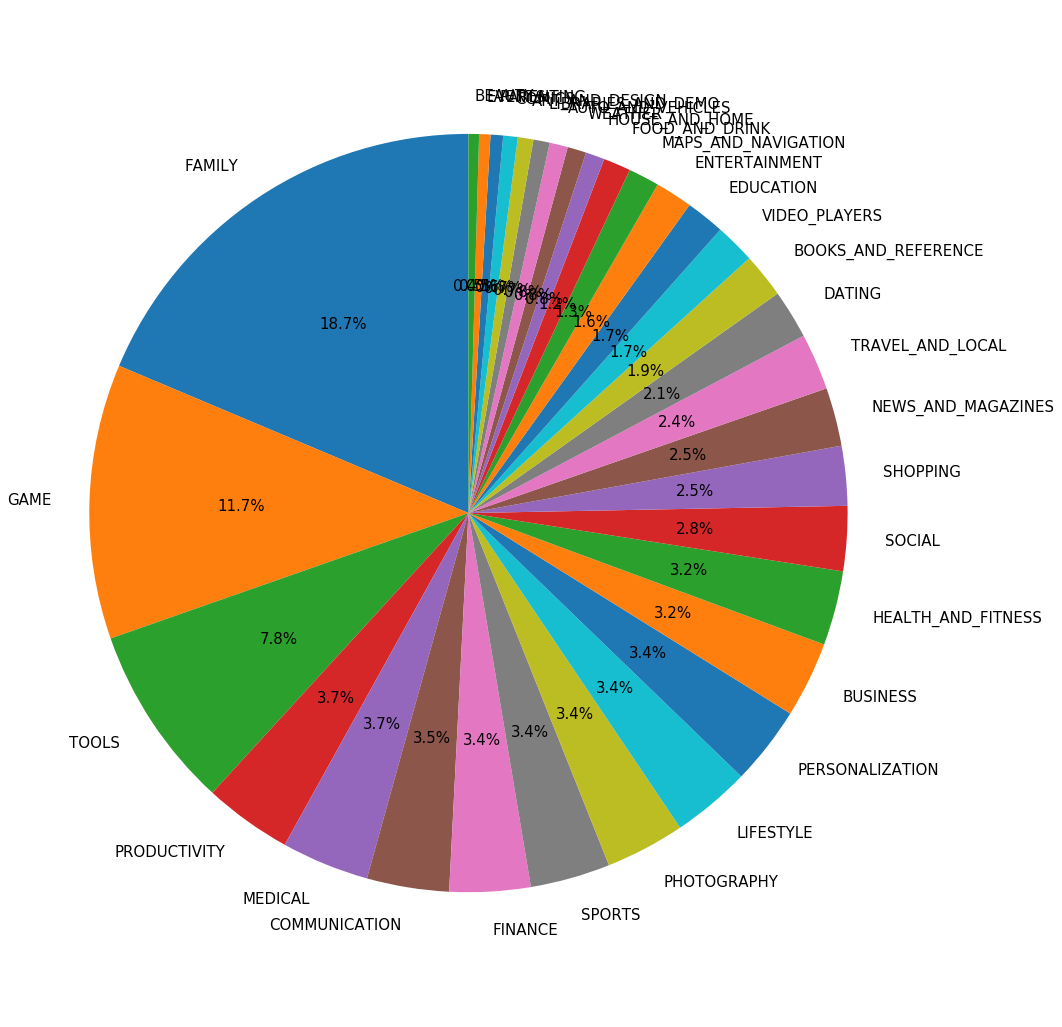

In [32]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = googlestore['Category'].value_counts().index
sizes = googlestore['Category'].value_counts()

matplotlib.rcParams['font.size'] = 15

fig1, ax1 = plt.subplots(figsize=(15, 15))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

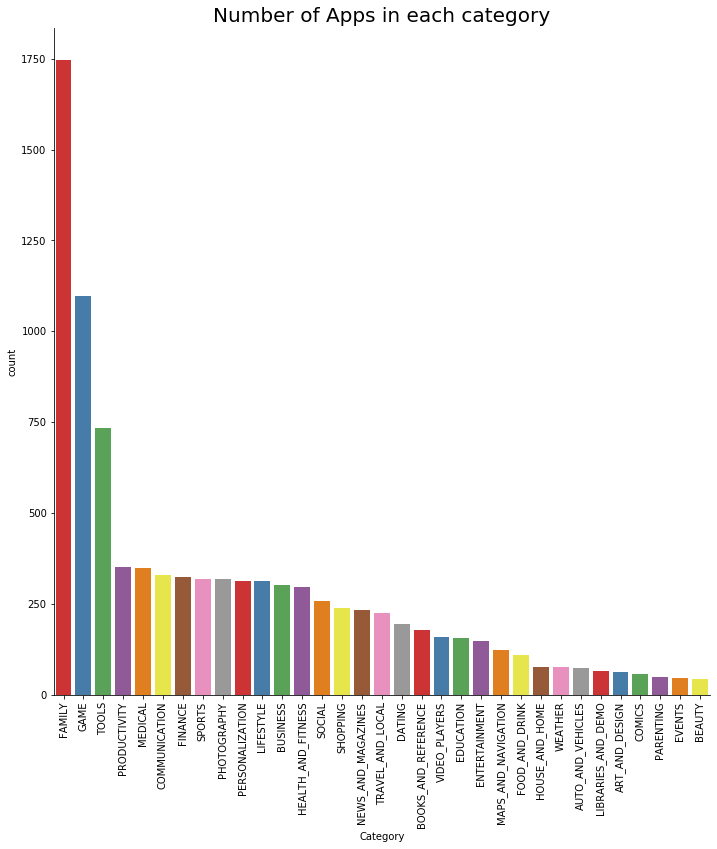

In [275]:
def plotchart(tab): 
    plot = sns.catplot(x=tab,y=compare, data=googlestore, kind=formats, height = 10,
    palette = "Set1", order= orders)
    plot.set_xticklabels(rotation=90, ha="center")
    plot = boxplot.set_ylabels(tab)
    plt.title(title,size = 20)
    plt.savefig(f"{title}.jpg")

tab = "Category"
compare = None
title = 'Number of Apps in each category'
orders= googlestore["Category"].value_counts().index
formats = "count"

plotchart(tab)

In [186]:
googlestore['Installs'].value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

# Which categories have the highest number of installs?

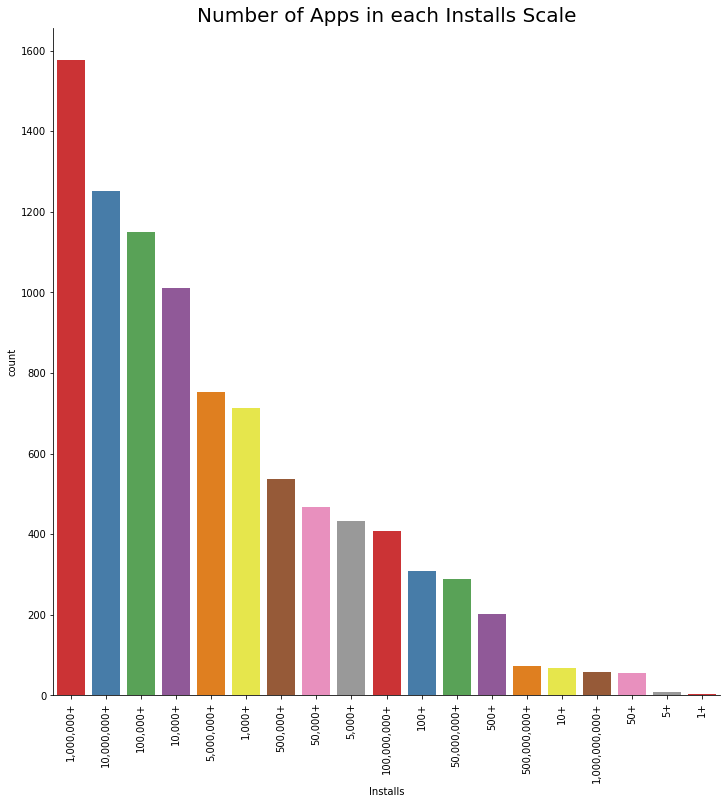

In [175]:
tab = "Installs"
compare = None
title = 'Number of Apps in each Installs Scale'
orders= googlestore["Installs"].value_counts().index
formats = "count"

plotchart(tab)

In [238]:
# Which categories have the highest number of installs?
group= googlestore.groupby(googlestore['Category'])
sum_installs = group["Installs"].sum()
sort_installs = sum_installs.sort_values(ascending=False)
sort_installs

Category
GAME                   35085862717
COMMUNICATION          32647241530
PRODUCTIVITY           14176070180
SOCIAL                 14069841475
TOOLS                  11450724500
FAMILY                 10257701590
PHOTOGRAPHY            10088243130
NEWS_AND_MAGAZINES      7496210650
TRAVEL_AND_LOCAL        6868859300
VIDEO_PLAYERS           6221897200
SHOPPING                3247831540
ENTERTAINMENT           2869160000
PERSONALIZATION         2325352930
BOOKS_AND_REFERENCE     1921291655
SPORTS                  1751131465
HEALTH_AND_FITNESS      1583056220
BUSINESS                1001768120
FINANCE                  876612400
EDUCATION                871352000
MAPS_AND_NAVIGATION      724267560
LIFESTYLE                537561120
WEATHER                  426096500
FOOD_AND_DRINK           273777750
DATING                   264295110
HOUSE_AND_HOME           168582000
ART_AND_DESIGN           124233100
LIBRARIES_AND_DEMO        62083000
COMICS                    56036100
MEDICAL    

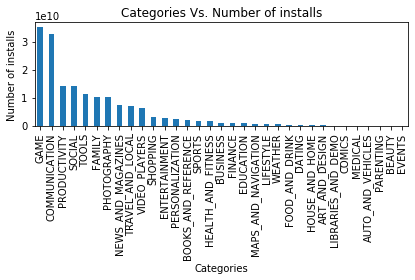

In [260]:
installs_plot = sort_installs.plot(kind="bar")

installs_plot.set_xticklabels(sort_installs.index, rotation = 90,ha="center")
# Configure plot and ticks

plt.title("Categories Vs. Number of installs")
plt.xlabel("Categories")
plt.ylabel("Number of installs")
# Set textual properties

plt.tight_layout()# Show plot
plt.savefig("Categories Vs. Number of installs.jpg")


In [259]:
print(f" In Google Play Store,  the category has the highest number of installs is {sort_installs.index[0]}.")

 In Google Play Store,  the category has the highest number of installs is GAME.


# What is the average price per category? (discounting free apps)


In [11]:
# find paid apps for Price is not equal to 0 
googlestore_df= googlestore[googlestore.Price != 0]
googlestore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,25-Mar-18
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,4.99,Everyone,11-Apr-17
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,25-Mar-18
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,4.99,Everyone,11-Apr-17
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,5-Jul-18


In [12]:
average_price = googlestore_df.groupby(["Category"])['Price'].mean()
                                                     
average_price_df = pd.DataFrame({'Average Price': average_price})

average_price_df = average_price.reset_index()

# What is the correlation between Installs and Reviews?

Text(0.5, 1, 'Reviews-Installs ')

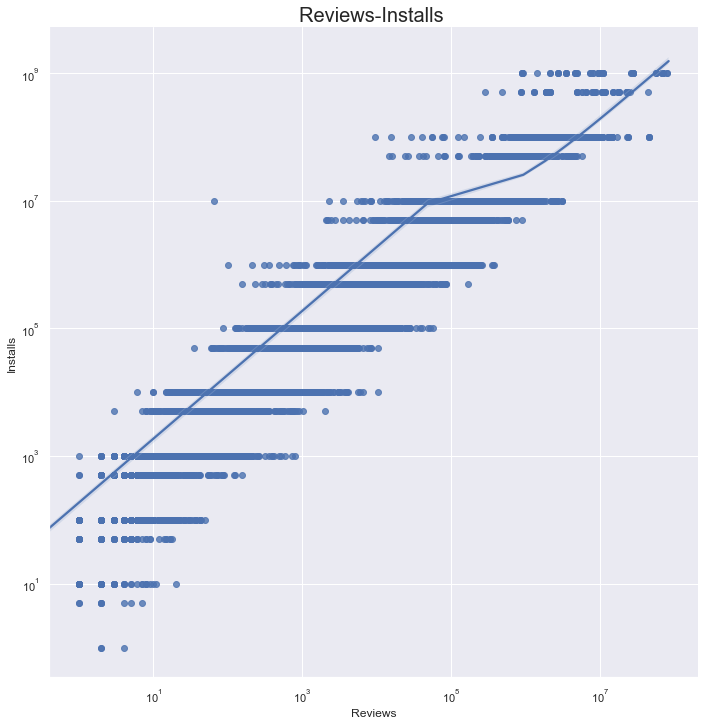

In [74]:
g = sns.lmplot(y="Installs", x="Reviews", data=googlestore, height=(10))
plt.xscale('log')
plt.yscale('log')
plt.title('Reviews-Installs ', size = 20)

In [75]:
installs = googlestore.iloc[:,5]
reviews = googlestore.iloc[:,3]
correlation = st.pearsonr(installs,reviews)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.64


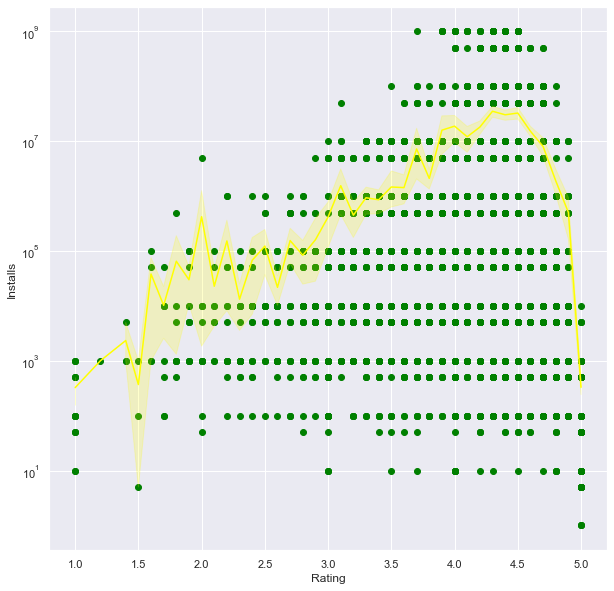

In [76]:
# What is the correlation between the rating and installs?
plt.figure(figsize=(10,10))
plt.scatter(x=googlestore['Rating'], y=googlestore['Installs'], color = 'green')
g = sns.lineplot(x="Rating", y="Installs",color="yellow",data=googlestore)
plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()

In [77]:
rating = googlestore.iloc[:,2]
correlation = st.pearsonr(installs,rating)
print(f"The correlation between an app's rating and the times it has been installed is {round(correlation[0],2)}")

The correlation between an app's rating and the times it has been installed is 0.05


Text(0.5, 1.0, 'Installs-Size(kilobyte) ')

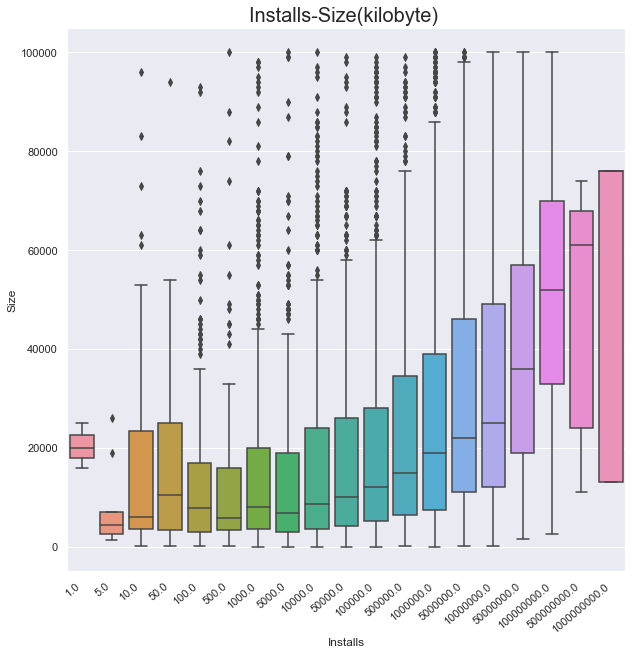

In [78]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x="Installs", y="Size", data=googlestore)
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.title('Installs-Size(kilobyte) ', size = 20)

In [79]:
size = googlestore.iloc[:,4]
size.dropna()


0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: Size, Length: 7729, dtype: float64

In [80]:
installs

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 9366, dtype: float64

In [81]:
correlation = st.pearsonr(installs,size)
print(f"The correlation between the size of the app and the number of installs is {round(correlation[0],2)}")

ValueError: array must not contain infs or NaNs